In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
images_dir = '/content/drive/MyDrive/AdvancedML/Homework1/Fig2.23/'

# Central Limit Theorem 

In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 5.0 MB/s 
     |████████████████████████████████| 128 kB 53.0 MB/s 
     |████████████████████████████████| 272 kB 53.6 MB/s 
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 120 kB 56.4 MB/s 
     |████████████████████████████████| 1.6 MB 51.7 MB/s 
     |████████████████████████████████| 82 kB 1.0 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 


In [4]:
latexify(width_scale_factor=2, fig_height=1.85)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:25: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [5]:
def calcMean(keys, N):
    # Generates N random numbers from 1 to 5 and calculates their mean.
    x = jnp.mean(jax.random.beta(keys, 1, 5, [1, N]))
    return x

In [7]:
def plot_convolutionHist(mean_list, N, sampleSize, bins):
    counts, nbinslocation = jnp.histogram(mean_list, bins=20)
    counts = counts / (sampleSize / bins)

    plt.figure()
    plt.title(f"N = {N}")
    plt.bar(nbinslocation[:-1], counts, width=0.02, color="black", align="edge")

    plt.xticks(jnp.linspace(0, 1, 3))
    plt.yticks(jnp.linspace(0, 3, 4))
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    plt.xlabel("$bins$")
    plt.ylabel("$Frequency\ (\mu)$")
    sns.despine()
    # savefig(f"clt_N_{N}")
    plt.savefig(f"{images_dir}/clt_N_{N}")
    # plt.show()

In [8]:
key = jax.random.PRNGKey(1)
keys = jax.random.split(key, num=10000)

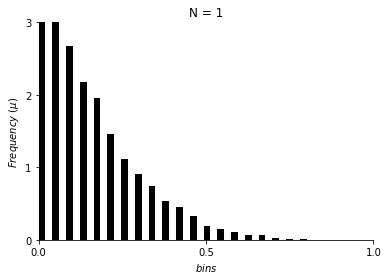

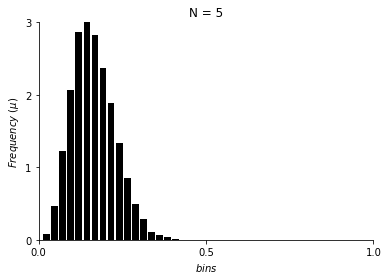

In [9]:
sampleSize = 10000
bins = 20
N_array = [1, 5]
for N in N_array:
    means = jax.vmap(calcMean, in_axes=(0, None), out_axes=0)
    out = means(keys, N)
    plot_convolutionHist(out, N, sampleSize, bins)

In [10]:
from ipywidgets import interact


@interact(N_value=(1, 10))
def generate_random(N_value):
    sampleSize = 100000
    bins = 20
    means = jax.vmap(calcMean, in_axes=(0, None), out_axes=0)
    out = means(keys, N_value)
    plot_convolutionHist(out, N_value, sampleSize, bins)

interactive(children=(IntSlider(value=5, description='N_value', max=10, min=1), Output()), _dom_classes=('widg…